# Matrix compression by truncated SVD

Compute the SVD of the following matrices $A$.  Plot the singular values as graph $i→σ_i$. How many terms $\nu$ in the truncated SVD do you need such that $‖A−A\nu‖_F ≤ \epsilon$ for $\epsilon ∈\{1e−2,1e−6\}$?  Matrix size e.g. $m= 400,n= 600$.  Use matplotlib.pyplot.matshow to plot the values of the matrix, the truncated matrices, and the difference:

(a) $A_{ij}= exp(−\frac{(i−200)^2+(j−300)^2}{10^2}) − 3 exp(−\frac{(i−350)^2+(j−100)^2}{20^2})$

(b) $A=I(for m= n= 400)$

(c and d) square
$$ A_{ij}= 1 for\;  i >20∧i <70∧j >50∧j <200  \;else \; 0$$
and rotated square:
$$A_{ij} = 1 for\;  i+j >40∧i+j <120∧|i−j|<30 \;else\; 0$$

(e)  matrix  compression  in  fast  multi-pole  method. $x_0,...,x_{m−1}∈R^2$ are  random positions of particles within $[0,1]^2$, and $y_0,... y_{n−1}∈R^2$ random positions within $[a,a+ 1]^2$. The interaction kernel $k(x,y)=1/‖x−y‖^2$ leads to the interactionmatrix $A_{i,j}=1/‖x_i−y_j‖^2$. Choose distances $a∈\{2,5,10\}$.

(f)  read red/green/blue values of some picture using matplotlib.image.imread into 3 matrices.

In [170]:
%matplotlib notebook
import numpy as np
import scipy
import scipy.linalg
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def a_matrix(m, n):
    m_list = np.linspace(0, 1, m)
    n_list = np.linspace(0, 1, n)
    mv, nv = np.meshgrid(m_list, n_list)
    
    return (np.exp(-((mv-200)**2+(nv-300)**2)/100) - 3*np.exp(-((mv-350)**2+(nv-100)**2)/(20**2)))


def b_matrix(m):
    return np.eye(m)


def c_matrix():
    A = np.zeros((400, 600))
    A[20:70, 50:200] = 1
    return A
    
def d_matrix():
    m = 400
    n = 600
    m_list = np.arange(m)
    n_list = np.arange(n)
    mv, nv = np.meshgrid(n_list, m_list)
    
    temp =  np.logical_and((mv + nv > 38), (mv + nv < 120))
    return np.logical_and((np.abs(mv-nv)<30), temp) * 1.0

def e_matrix(a):
    m = 400
    n = 600
    x = np.random.rand(m, 2)
    y = np.random.rand(n, 2) + a
    return 1/np.linalg.norm(np.subtract(x[:,np.newaxis], y), axis=2)

In [171]:
a = np.array([[1, 10], [2, 20], [3, 30]])
b = np.array([[1, 10], [2, 20], [3, 30], [3, 30]])

1 / np.linalg.norm(np.subtract(a[:,np.newaxis], b), axis=2)

<ipython-input-171-b1e7c5908bb0>:4: RuntimeWarning: divide by zero encountered in true_divide
  1 / np.linalg.norm(np.subtract(a[:,np.newaxis], b), axis=2)


array([[       inf, 0.09950372, 0.04975186, 0.04975186],
       [0.09950372,        inf, 0.09950372, 0.09950372],
       [0.04975186, 0.09950372,        inf,        inf]])

<IPython.core.display.Javascript object>


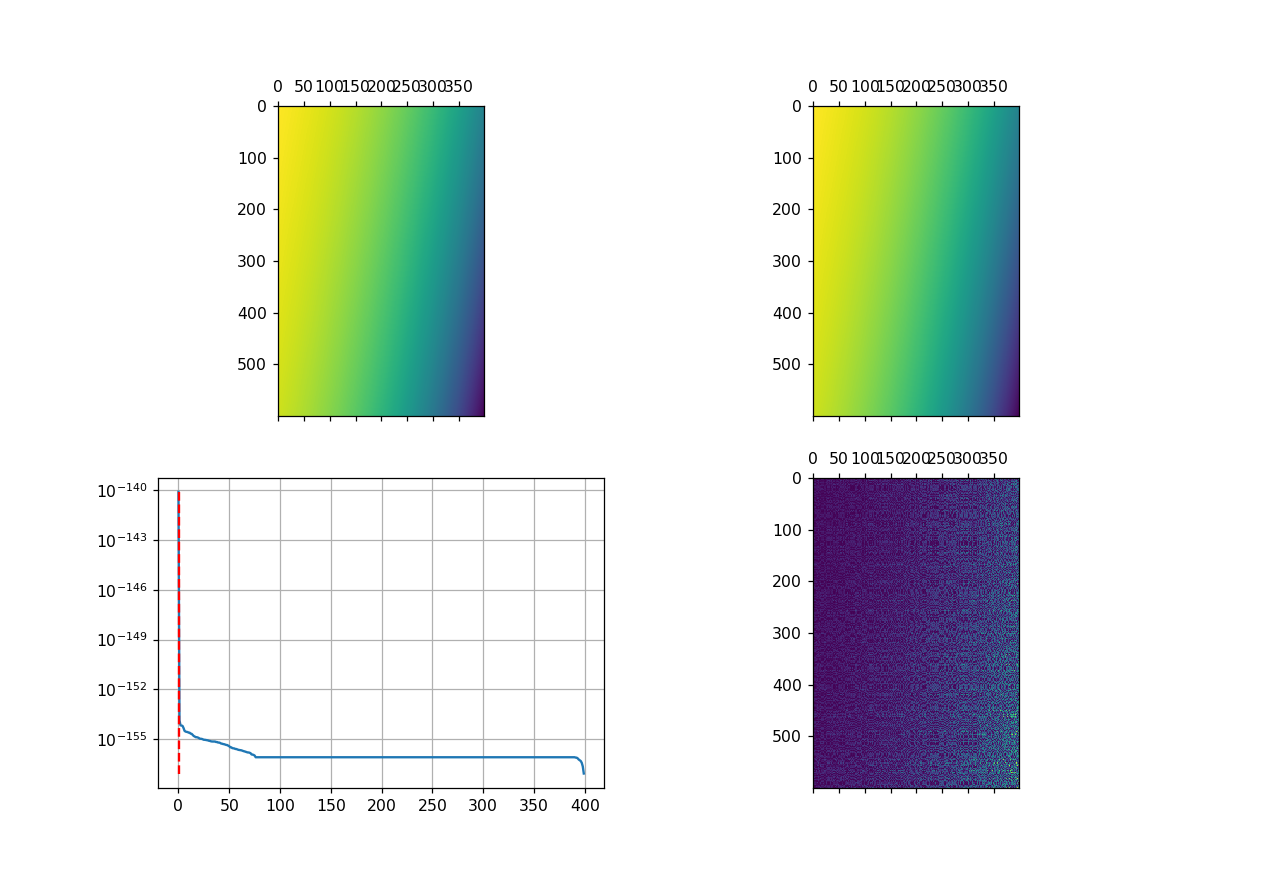

interactive(children=(IntSlider(value=1, description='threshold', max=50, min=1), Output()), _dom_classes=('wi…

<IPython.core.display.Javascript object>


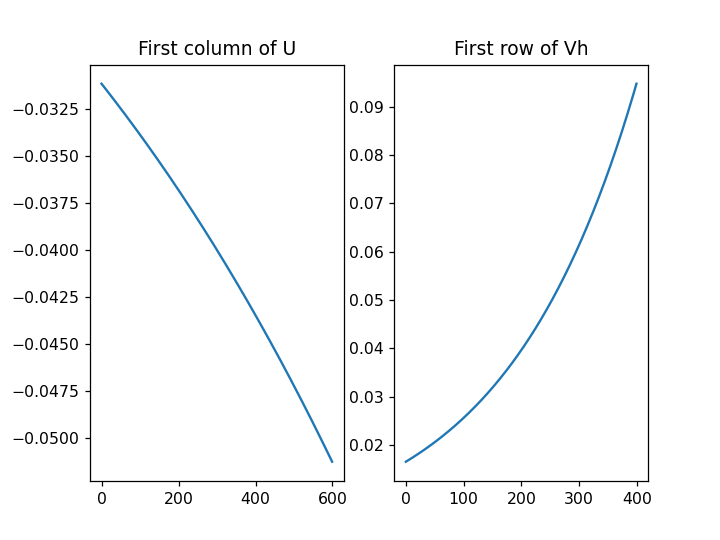

Text(0.5, 1.0, 'First row of Vh')

In [172]:
# (a)
A = a_matrix(400, 600)
U, s, Vh = scipy.linalg.svd(A)


fig, axes = plt.subplots(2, 2, figsize = (10, 7))
axes[0][0].matshow(A)
# fig.colorbar(A, ax=axes[0, 0])
axes[1][0].plot(s)
line, = axes[1][0].plot([1, 1], [np.min(s), np.max(s)], 'r--')
axes[1][0].grid()
axes[1][0].set_yscale('log')
mat = axes[0][1].matshow(A)
mat_diff = axes[1][1].matshow(A)


def update(threshold):
    A_reconstructred = U[:, :threshold] @ np.diag(s[:threshold]) @ Vh[:threshold, :]
    print(np.linalg.norm(A - A_reconstructred))
    mat.set_data(A_reconstructred)
    # mat_diff.set_data(np.abs(A - A_reconstructred))
    axes[1][1].matshow(np.abs(A - A_reconstructred))
    line.set_xdata([threshold, threshold])
    return mat 

interact(update, threshold = widgets.IntSlider(value=1,
                                                  min=1,
                                                  max=50))

fig, axes2 = plt.subplots(1, 2)
axes2[0].plot(U[:, :1])
axes2[0].set_title("First column of U")
axes2[1].plot(Vh[:1, :].T)
axes2[1].set_title("First row of Vh")

<IPython.core.display.Javascript object>


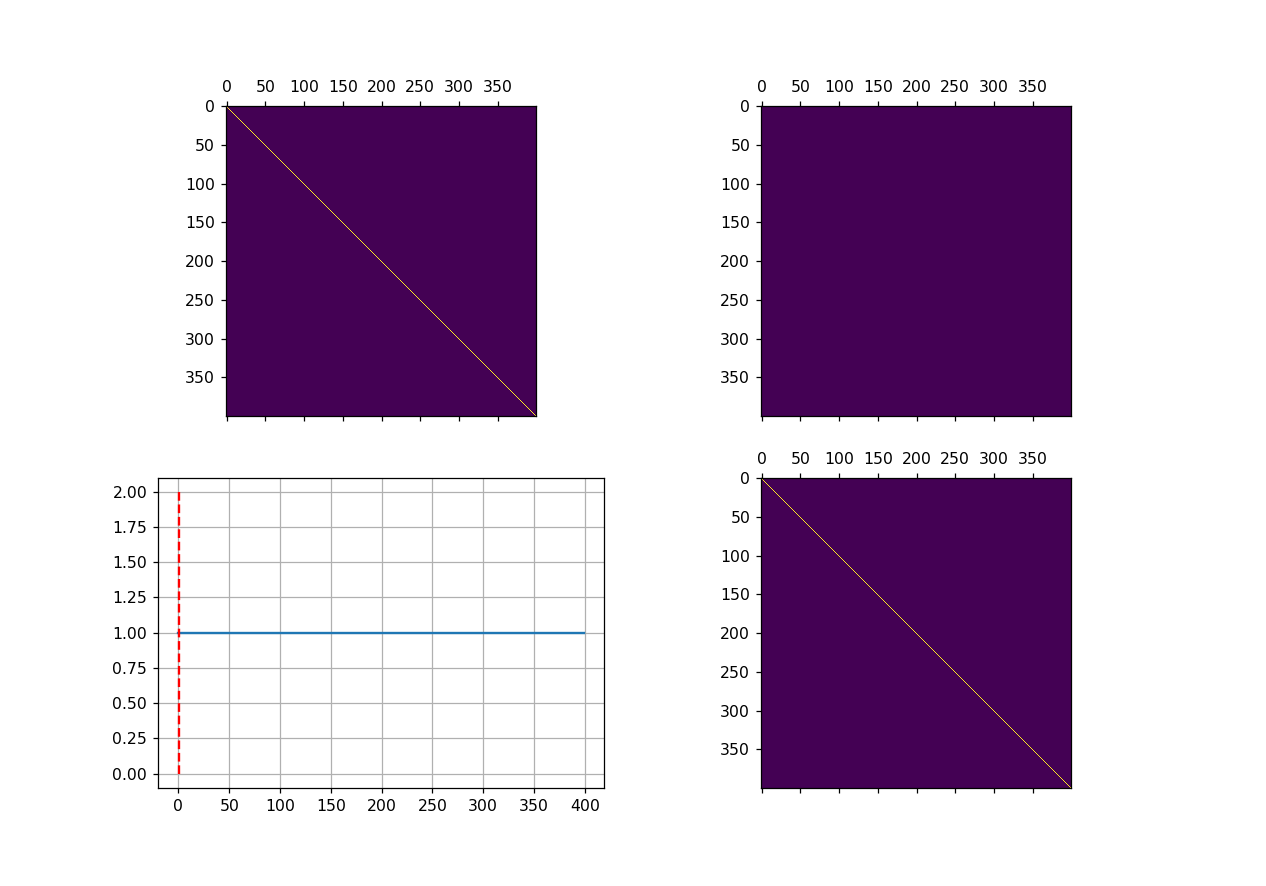

interactive(children=(IntSlider(value=1, description='threshold', max=400, min=1), Output()), _dom_classes=('w…

<function __main__.update(threshold)>

In [117]:
# (b)
A = b_matrix(400)
U, s, Vh = scipy.linalg.svd(A)

fig, axes = plt.subplots(2, 2, figsize = (10, 7))
axes[0][0].matshow(A)
# fig.colorbar(A, ax=axes[0, 0])
axes[1][0].plot(s)
line, = axes[1][0].plot([1, 1], [np.min(s)-1, np.max(s)+1], 'r--')
axes[1][0].grid()
mat = axes[0][1].matshow(A)
mat_diff = axes[1][1].matshow(A)

def update(threshold):
    A_reconstructred = U[:, :threshold] @ np.diag(s[:threshold]) @ Vh[:threshold, :]
    print(np.linalg.norm(A - A_reconstructred))
    mat.set_data(A_reconstructred)
    mat_diff.set_data(A - A_reconstructred)
    line.set_xdata([threshold, threshold])
    return mat 

interact(update, threshold = widgets.IntSlider(value=1,
                                                  min=1,
                                                  max=s.shape[0]))


<IPython.core.display.Javascript object>


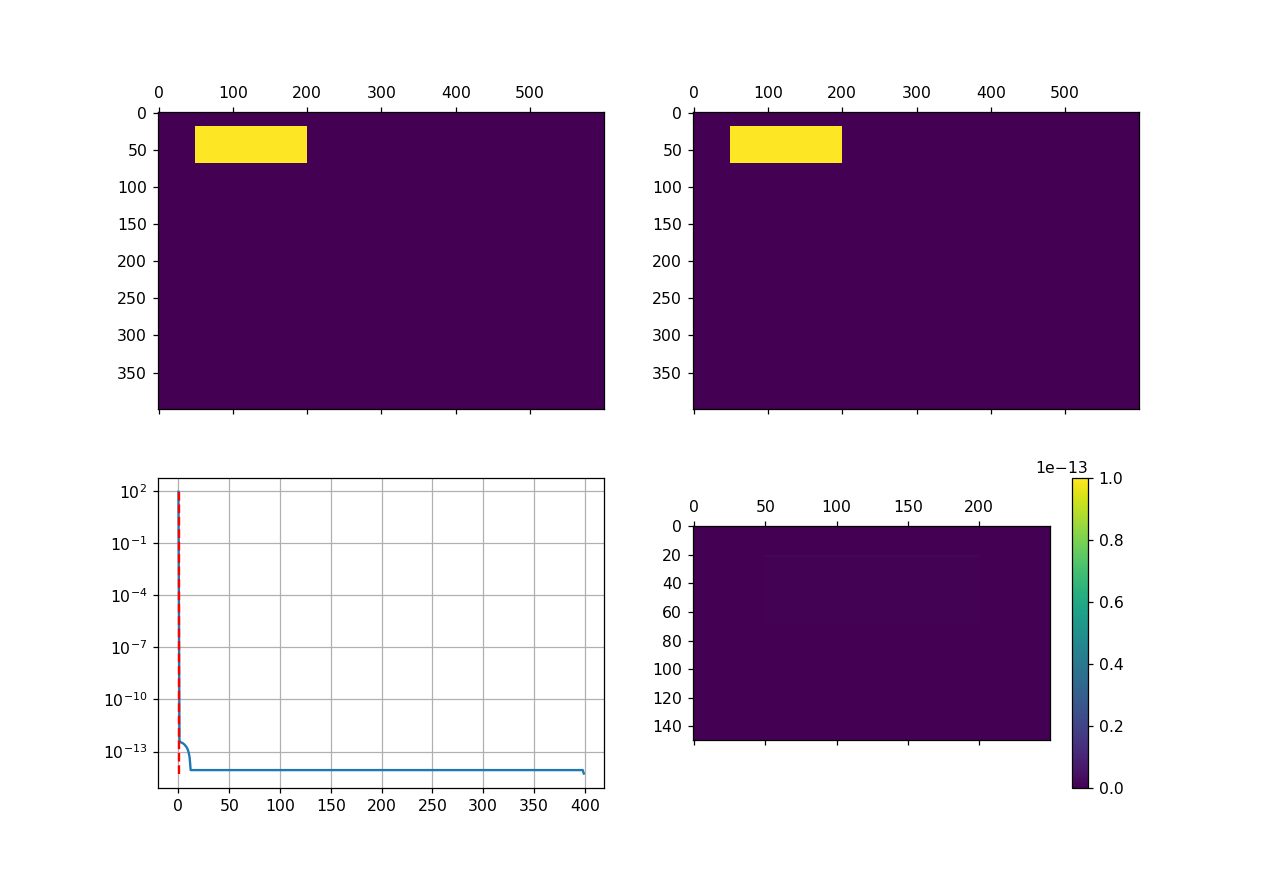

interactive(children=(IntSlider(value=1, description='threshold', max=400, min=1), Output()), _dom_classes=('w…

<IPython.core.display.Javascript object>


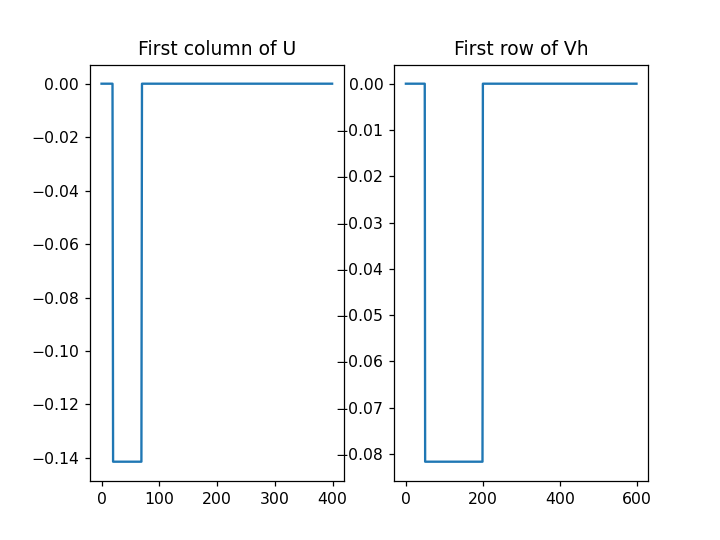

Text(0.5, 1.0, 'First row of Vh')

In [163]:
# (c)
A = c_matrix()
U, s, Vh = scipy.linalg.svd(A)

fig, axes = plt.subplots(2, 2, figsize = (10, 7))
axes[0][0].matshow(A)
# fig.colorbar(A, ax=axes[0, 0])
axes[1][0].plot(s)
line, = axes[1][0].plot([1, 1], [np.min(s), np.max(s)], 'r--')
axes[1][0].grid()
axes[1][0].set_yscale('log')
mat = axes[0][1].matshow(A)

A_reconstructred = U[:, :1] @ np.diag(s[:1]) @ Vh[:1, :]
mat_diff = axes[1][1].matshow(np.abs(A - A_reconstructred), vmin=0, vmax=1e-13)
cbar = plt.colorbar(mat_diff)



def update(threshold):
    A_reconstructred = U[:, :threshold] @ np.diag(s[:threshold]) @ Vh[:threshold, :]
    print(np.linalg.norm(A - A_reconstructred))
    mat.set_data(A_reconstructred)
    mat_diff.set_data(np.abs(A - A_reconstructred))
    axes[1][1].matshow(np.abs((A - A_reconstructred)[:150, :250]), vmin=0, vmax=1e-13)
    # cbar.set_clim(vmin=0,vmax=2)
    line.set_xdata([threshold, threshold])
    return mat 

interact(update, threshold = widgets.IntSlider(value=1,
                                                  min=1,
                                                  max=s.shape[0]))

fig, axes2 = plt.subplots(1, 2)
axes2[0].plot(U[:, :1])
axes2[0].set_title("First column of U")
axes2[1].plot(Vh[:1, :].T)
axes2[1].set_title("First row of Vh")

In [91]:
Vh[:1, :].shape

(1, 600)

<IPython.core.display.Javascript object>


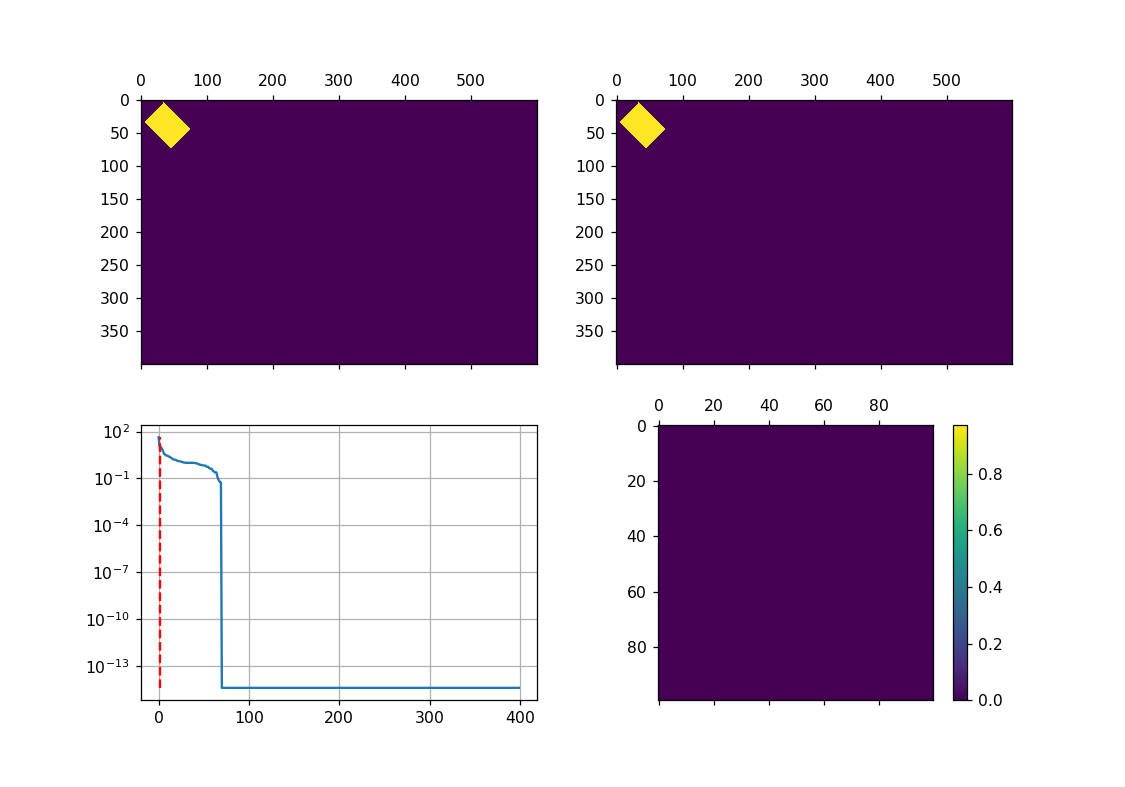

interactive(children=(IntSlider(value=1, description='threshold', max=70, min=1), Output()), _dom_classes=('wi…

<IPython.core.display.Javascript object>


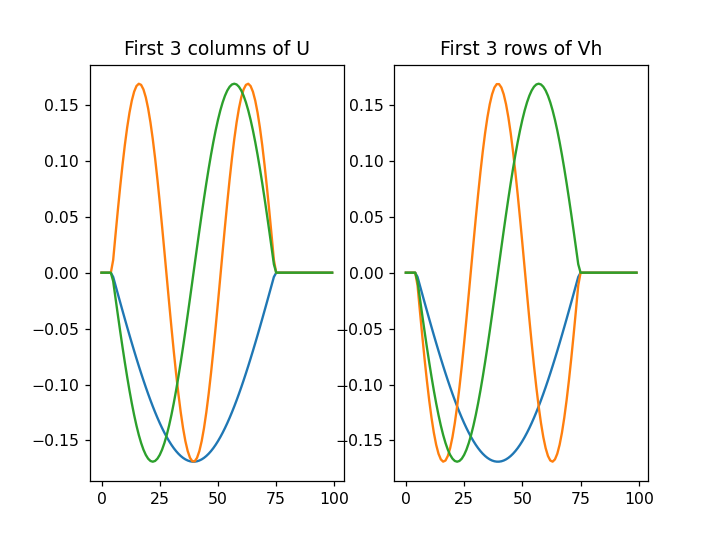

Text(0.5, 1.0, 'First 3 rows of Vh')

In [168]:
# (d)
A = d_matrix()
U, s, Vh = scipy.linalg.svd(A)

fig, axes = plt.subplots(2, 2, figsize = (10, 7))
axes[0][0].matshow(A)
# fig.colorbar(A, ax=axes[0, 0])
axes[1][0].plot(s)
line, = axes[1][0].plot([1, 1], [np.min(s), np.max(s)], 'r--')
axes[1][0].grid()
axes[1][0].set_yscale('log')
mat = axes[0][1].matshow(A)

A_reconstructred = U[:, :1] @ np.diag(s[:1]) @ Vh[:1, :]
mat_diff = axes[1][1].matshow(np.abs(A_reconstructred - A)[:100, :100])
cbar = plt.colorbar(mat_diff)


def update(threshold):
    A_reconstructred = U[:, :threshold] @ np.diag(s[:threshold]) @ Vh[:threshold, :]
    print(np.linalg.norm(A - A_reconstructred))
    mat.set_data(A_reconstructred)
    mat_diff.set_data(np.abs(A_reconstructred - A)[:100, :100])
    line.set_xdata([threshold, threshold])
    return mat 

interact(update, threshold = widgets.IntSlider(value=1,
                                                  min=1,
                                                  max=70))

fig, axes = plt.subplots(1, 2)
axes[0].plot(U[:100, :3])
axes[0].set_title("First 3 columns of U")
axes[1].plot(Vh[:3, :100].T)
axes[1].set_title("First 3 rows of Vh")

<IPython.core.display.Javascript object>


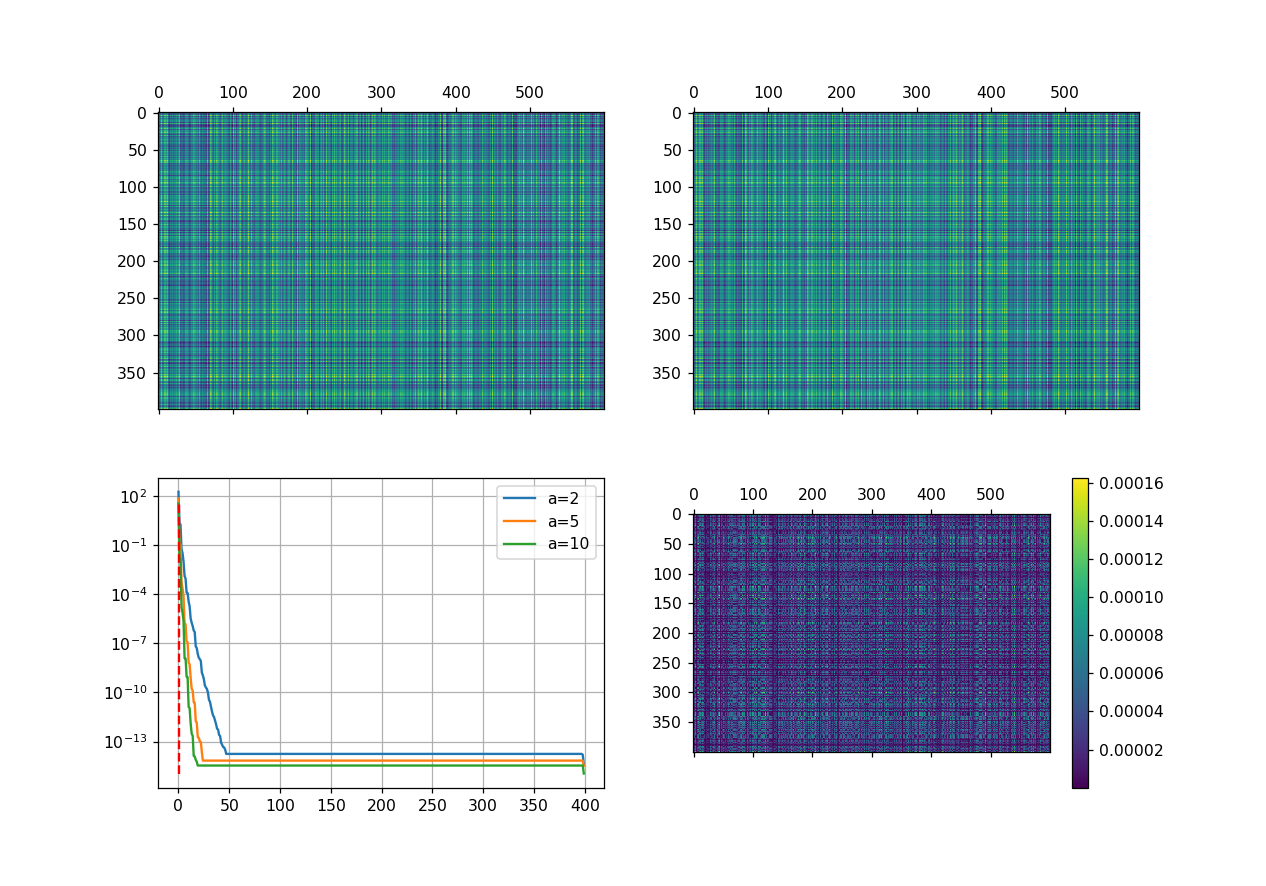

interactive(children=(IntSlider(value=1, description='threshold', max=400, min=1), Output()), _dom_classes=('w…

<IPython.core.display.Javascript object>


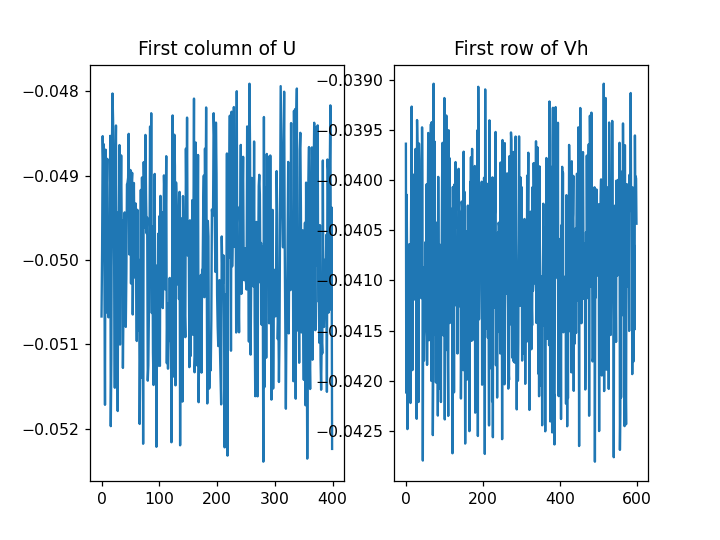

Text(0.5, 1.0, 'First row of Vh')

In [169]:
# (e)
A1 = e_matrix(2)
A2 = e_matrix(5)
A = e_matrix(10)
U, s1, Vh = scipy.linalg.svd(A1)
U, s2, Vh = scipy.linalg.svd(A2)
U, s, Vh = scipy.linalg.svd(A)

fig, axes = plt.subplots(2, 2, figsize = (10, 7))
axes[0][0].matshow(A)
# fig.colorbar(A, ax=axes[0, 0])
axes[1][0].plot(s1, label="a=2")
axes[1][0].plot(s2, label="a=5")
axes[1][0].plot(s, label="a=10")
line, = axes[1][0].plot([1, 1], [np.min(s), np.max(s)], 'r--')
axes[1][0].grid()
axes[1][0].set_yscale('log')
axes[1][0].legend()
mat = axes[0][1].matshow(A)

A_reconstructred = U[:, :1] @ np.diag(s[:1]) @ Vh[:1, :]
mat_diff = axes[1][1].matshow(np.abs(A_reconstructred - A)[:100, :100])
cbar = plt.colorbar(mat_diff)

def update(threshold):
    A_reconstructred = U[:, :threshold] @ np.diag(s[:threshold]) @ Vh[:threshold, :]
    print(np.linalg.norm(A - A_reconstructred))
    mat.set_data(A_reconstructred)
    mat_diff.set_data(np.abs(A_reconstructred-A))
    axes[1][1].matshow(np.abs(A_reconstructred-A))
    
    line.set_xdata([threshold, threshold])
    return mat 

interact(update, threshold = widgets.IntSlider(value=1,
                                                  min=1,
                                                  max=s.shape[0]))

fig, axes2 = plt.subplots(1, 2)
axes2[0].plot(U[:, :1])
axes2[0].set_title("First column of U")
axes2[1].plot(Vh[:1, :].T)
axes2[1].set_title("First row of Vh")

In [130]:
mat_diff

<IPython.core.display.Javascript object>


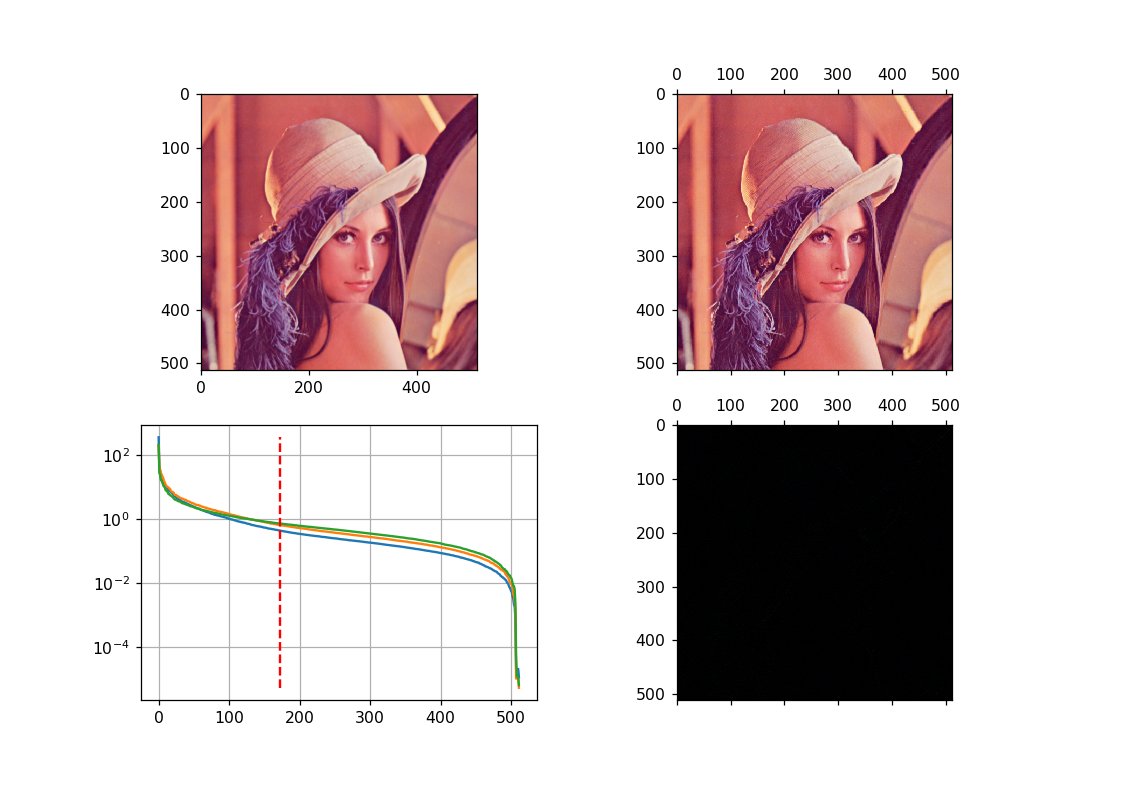

interactive(children=(IntSlider(value=1, description='threshold', max=512, min=1), Output()), _dom_classes=('w…

<function __main__.update(threshold)>

In [173]:
RGB = matplotlib.image.imread("lena.png")

U = []
s = []
Vh = []
for idx in range(3):
    U_temp, s_temp, Vh_temp = scipy.linalg.svd(RGB[:, :, idx])
    U.append(U_temp)
    s.append(s_temp)
    Vh.append(Vh_temp)
    
U = np.array(U)
s = np.array(s)
Vh = np.array(Vh)

fig, axes = plt.subplots(2, 2, figsize = (10, 7))
axes[0][0].imshow(RGB)
# fig.colorbar(A, ax=axes[0, 0])
axes[1][0].plot(s.T)
line, = axes[1][0].plot([1, 1], [np.min(s), np.max(s)], 'r--')
axes[1][0].grid()
axes[1][0].set_yscale('log')
mat = axes[0][1].matshow(RGB)
mat_diff = axes[1][1].matshow(RGB)

def update(threshold):
    RGB_reconstructred = np.empty(RGB.shape)
    RGB_reconstructred[:, :, 0] = U[0, :, :threshold] @ np.diag(s[0, :threshold]) @ Vh[0, :threshold, :]
    RGB_reconstructred[:, :, 1] = U[1, :, :threshold] @ np.diag(s[1, :threshold]) @ Vh[1, :threshold, :]
    RGB_reconstructred[:, :, 2] = U[2, :, :threshold] @ np.diag(s[2, :threshold]) @ Vh[2, :threshold, :]
    
    print(np.linalg.norm(RGB - RGB_reconstructred))
    mat.set_data(RGB_reconstructred)
    mat_diff.set_data(RGB_reconstructred-RGB)
    line.set_xdata([threshold, threshold])
    return mat 

interact(update, threshold = widgets.IntSlider(value=1,
                                                  min=1,
                                                  max=s.shape[1]))